Gradient Boosting Model (XGboost) with HFT with and without the top 10 most commonly used technical indicators

In [2]:
import pandas as pd

# Load the dataset from the CSV file
file_path = 'q1_filtered_dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Continue with the previous code


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Drop the unnecessary 'Unnamed: 0' column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Parse the date column as datetime
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# Set the date as the index
data_cleaned.set_index('date', inplace=True)

# Define the features (X) and target variable (y)
X = data_cleaned.drop(columns=['close'])  # We'll predict the 'close' price
y = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((19032, 6), (4758, 6), (19032,), (4758,))

In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

# Train the model
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 15.358207392304545
Root Mean Squared Error: 3.918954885209135
R-squared: 0.8524838469494487


SMA

MSE without SMA: 11.700751640647484
R-squared without SMA: 0.8876609903343922
MSE with SMA: 6.5164608731714075
R-squared with SMA: 0.9374354072713017


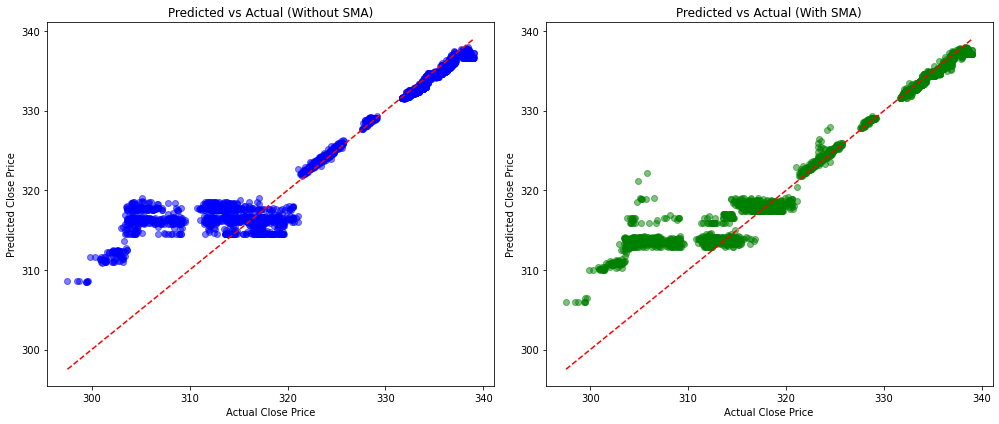

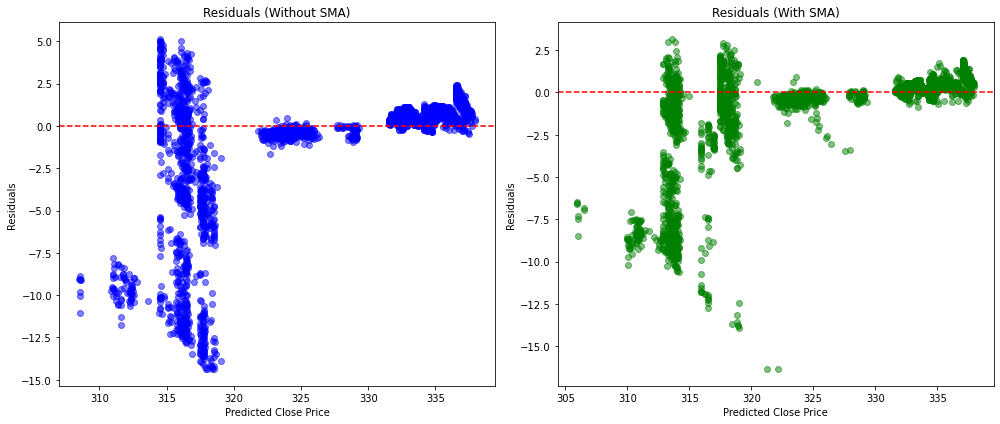

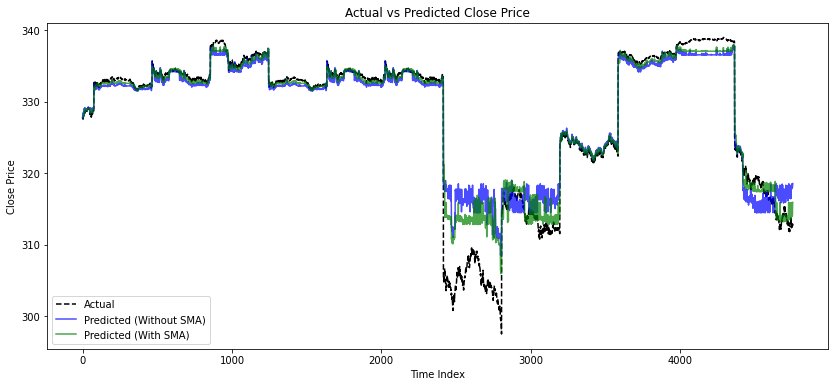

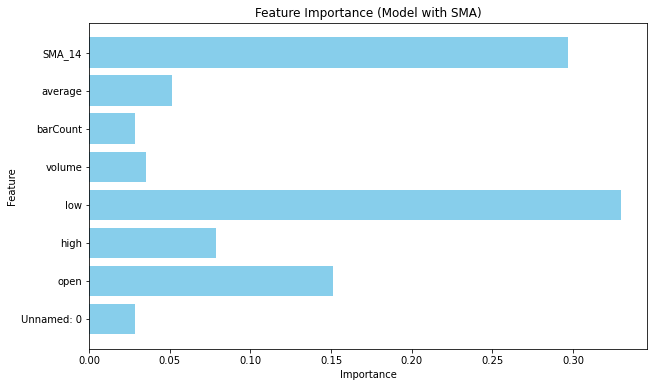

In [8]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming it's already cleaned as before)
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Calculate the 14-period SMA
data_cleaned['SMA_14'] = data_cleaned['close'].rolling(window=14).mean()

# Drop rows with NaN values caused by the SMA calculation
data_cleaned.dropna(inplace=True)

# Define features (X) and target variable (y) for both scenarios
X = data_cleaned.drop(columns=['close', 'SMA_14'])
y = data_cleaned['close']

X_with_sma = data_cleaned.drop(columns=['close'])
y_with_sma = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_sma, X_test_sma, y_train_sma, y_test_sma = train_test_split(X_with_sma, y_with_sma, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model without SMA
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

# Initialize and train the XGBoost model with SMA
xg_reg_sma = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=100)
xg_reg_sma.fit(X_train_sma, y_train_sma)
y_pred_sma = xg_reg_sma.predict(X_test_sma)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_sma = mean_squared_error(y_test_sma, y_pred_sma)
r2_sma = r2_score(y_test_sma, y_pred_sma)

print(f'MSE without SMA: {mse}')
print(f'R-squared without SMA: {r2}')
print(f'MSE with SMA: {mse_sma}')
print(f'R-squared with SMA: {r2_sma}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without SMA
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without SMA)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With SMA
plt.subplot(1, 2, 2)
plt.scatter(y_test_sma, y_pred_sma, alpha=0.5, color='green')
plt.plot([y_test_sma.min(), y_test_sma.max()], [y_test_sma.min(), y_test_sma.max()], '--r')
plt.title('Predicted vs Actual (With SMA)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without SMA
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without SMA)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With SMA
plt.subplot(1, 2, 2)
plt.scatter(y_pred_sma, y_test_sma - y_pred_sma, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With SMA)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without SMA)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_sma)), y_pred_sma, label='Predicted (With SMA)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with SMA
feature_importances = xg_reg_sma.feature_importances_
features = X_with_sma.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with SMA)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


EMA

MSE without EMA: 9.425980366368613
R-squared without EMA: 0.9094631081050873
MSE with EMA: 5.332475817619396
R-squared with EMA: 0.9487813715001363


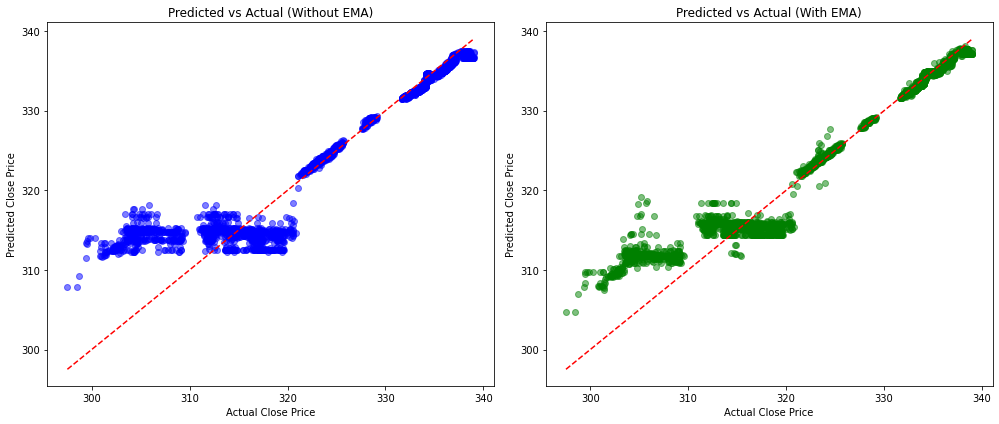

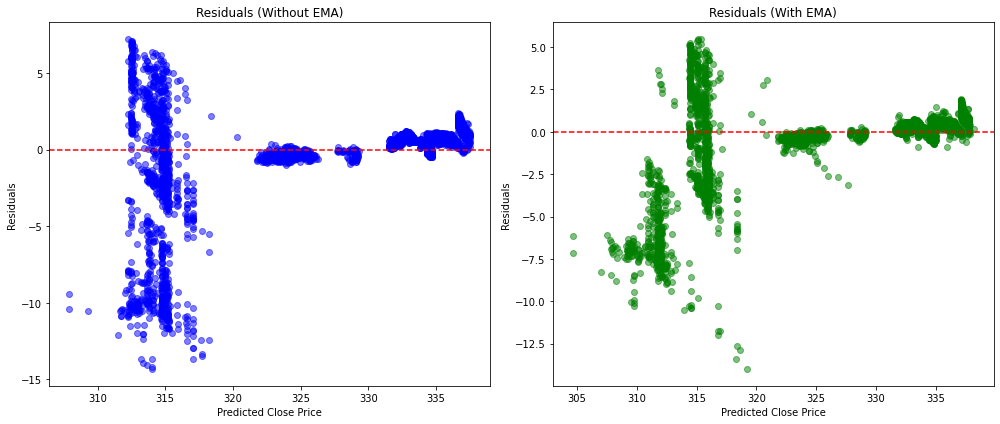

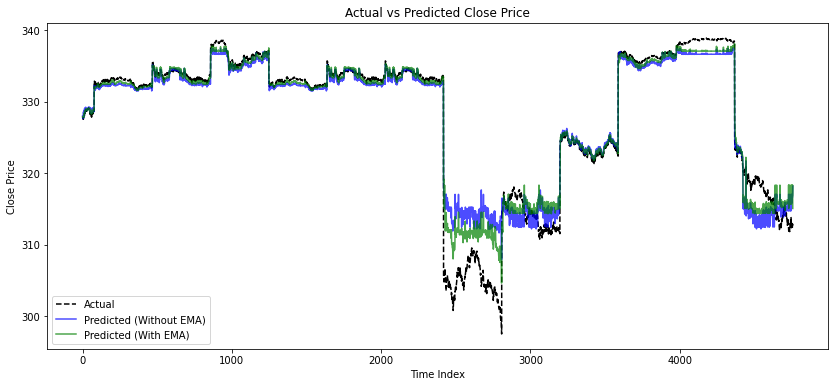

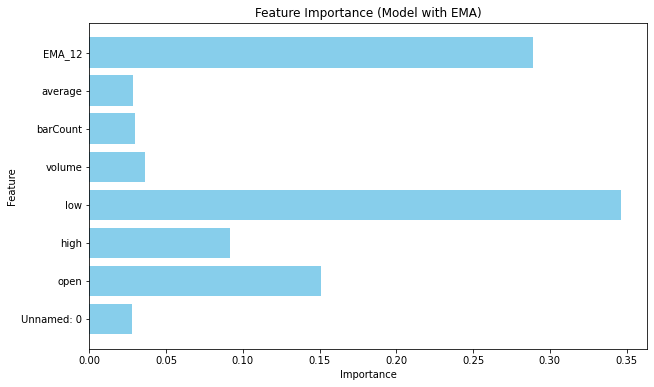

In [9]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming it's already cleaned as before)
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Calculate the 12-period EMA
data_cleaned['EMA_12'] = data_cleaned['close'].ewm(span=12, adjust=False).mean()

# Drop rows with NaN values caused by the EMA calculation
data_cleaned.dropna(inplace=True)

# Define features (X) and target variable (y) for both scenarios
X = data_cleaned.drop(columns=['close', 'EMA_12'])
y = data_cleaned['close']

X_with_ema = data_cleaned.drop(columns=['close'])
y_with_ema = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_ema, X_test_ema, y_train_ema, y_test_ema = train_test_split(X_with_ema, y_with_ema, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model without EMA
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

# Initialize and train the XGBoost model with EMA
xg_reg_ema = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=100)
xg_reg_ema.fit(X_train_ema, y_train_ema)
y_pred_ema = xg_reg_ema.predict(X_test_ema)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_ema = mean_squared_error(y_test_ema, y_pred_ema)
r2_ema = r2_score(y_test_ema, y_pred_ema)

print(f'MSE without EMA: {mse}')
print(f'R-squared without EMA: {r2}')
print(f'MSE with EMA: {mse_ema}')
print(f'R-squared with EMA: {r2_ema}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without EMA
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without EMA)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With EMA
plt.subplot(1, 2, 2)
plt.scatter(y_test_ema, y_pred_ema, alpha=0.5, color='green')
plt.plot([y_test_ema.min(), y_test_ema.max()], [y_test_ema.min(), y_test_ema.max()], '--r')
plt.title('Predicted vs Actual (With EMA)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without EMA
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without EMA)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With EMA
plt.subplot(1, 2, 2)
plt.scatter(y_pred_ema, y_test_ema - y_pred_ema, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With EMA)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without EMA)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_ema)), y_pred_ema, label='Predicted (With EMA)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with EMA
feature_importances = xg_reg_ema.feature_importances_
features = X_with_ema.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with EMA)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


MACD

MSE without MACD: 9.425980366368613
R-squared without MACD: 0.9094631081050873
MSE with MACD: 6.667590570631765
R-squared with MACD: 0.9359575446553375


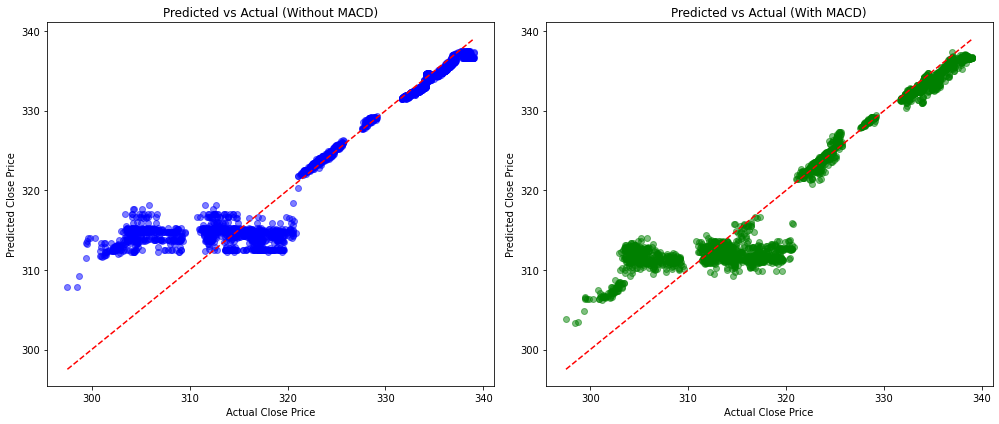

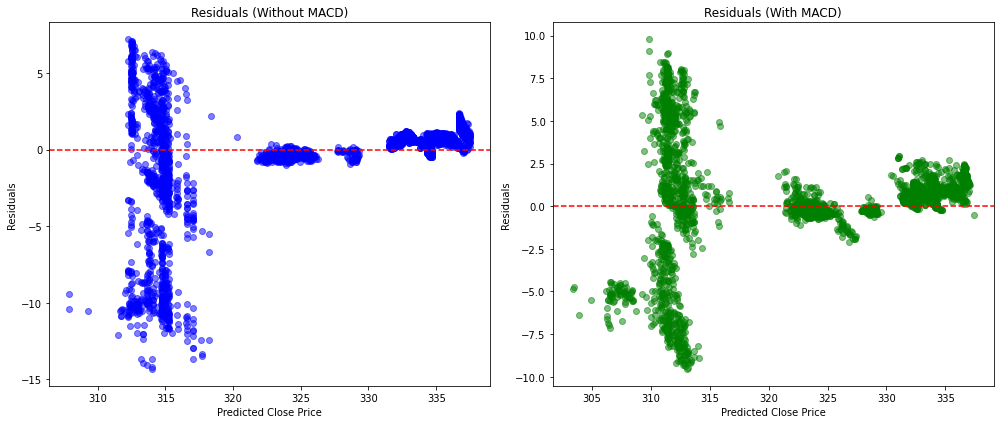

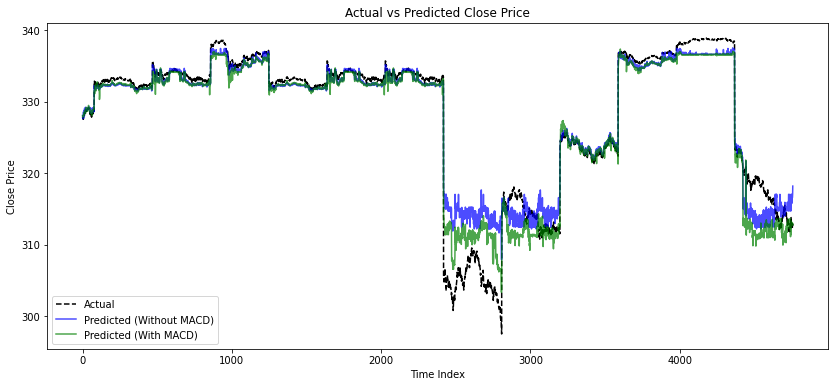

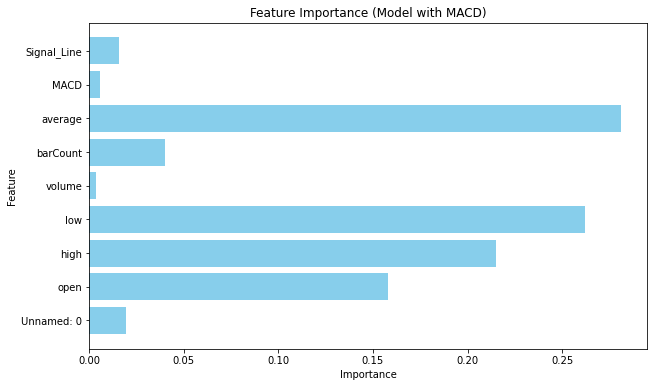

In [10]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming it's already cleaned as before)
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Calculate the 12-period and 26-period EMA
data_cleaned['EMA_12'] = data_cleaned['close'].ewm(span=12, adjust=False).mean()
data_cleaned['EMA_26'] = data_cleaned['close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD and the Signal Line
data_cleaned['MACD'] = data_cleaned['EMA_12'] - data_cleaned['EMA_26']
data_cleaned['Signal_Line'] = data_cleaned['MACD'].ewm(span=9, adjust=False).mean()

# Drop rows with NaN values caused by the MACD calculation
data_cleaned.dropna(inplace=True)

# Define features (X) and target variable (y) for both scenarios
X = data_cleaned.drop(columns=['close', 'MACD', 'Signal_Line', 'EMA_12', 'EMA_26'])
y = data_cleaned['close']

X_with_macd = data_cleaned.drop(columns=['close', 'EMA_12', 'EMA_26'])
y_with_macd = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_macd, X_test_macd, y_train_macd, y_test_macd = train_test_split(X_with_macd, y_with_macd, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model without MACD
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

# Initialize and train the XGBoost model with MACD
xg_reg_macd = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                               max_depth=5, alpha=10, n_estimators=100)
xg_reg_macd.fit(X_train_macd, y_train_macd)
y_pred_macd = xg_reg_macd.predict(X_test_macd)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_macd = mean_squared_error(y_test_macd, y_pred_macd)
r2_macd = r2_score(y_test_macd, y_pred_macd)

print(f'MSE without MACD: {mse}')
print(f'R-squared without MACD: {r2}')
print(f'MSE with MACD: {mse_macd}')
print(f'R-squared with MACD: {r2_macd}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without MACD
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without MACD)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With MACD
plt.subplot(1, 2, 2)
plt.scatter(y_test_macd, y_pred_macd, alpha=0.5, color='green')
plt.plot([y_test_macd.min(), y_test_macd.max()], [y_test_macd.min(), y_test_macd.max()], '--r')
plt.title('Predicted vs Actual (With MACD)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without MACD
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without MACD)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With MACD
plt.subplot(1, 2, 2)
plt.scatter(y_pred_macd, y_test_macd - y_pred_macd, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With MACD)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without MACD)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_macd)), y_pred_macd, label='Predicted (With MACD)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with MACD
feature_importances = xg_reg_macd.feature_importances_
features = X_with_macd.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with MACD)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


RSI

MSE without RSI: 9.9322442578025
R-squared without RSI: 0.904600424604007
MSE with RSI: 7.860197799401441
R-squared with RSI: 0.9245025078795917


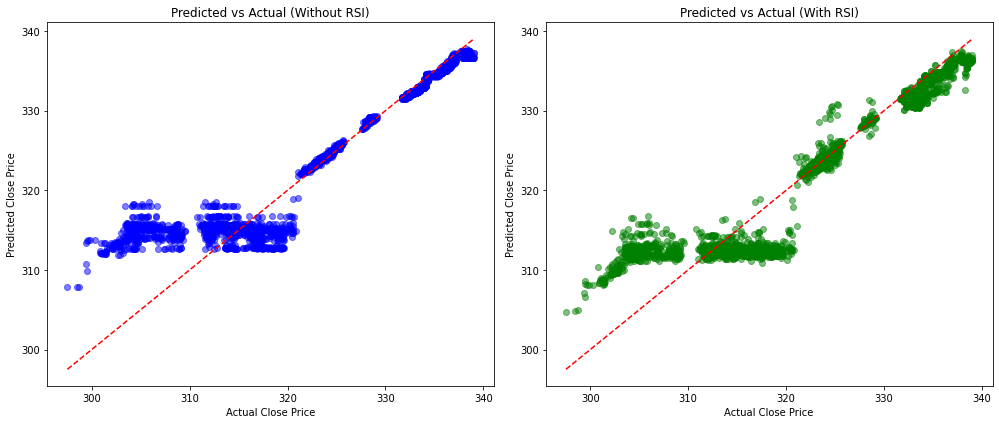

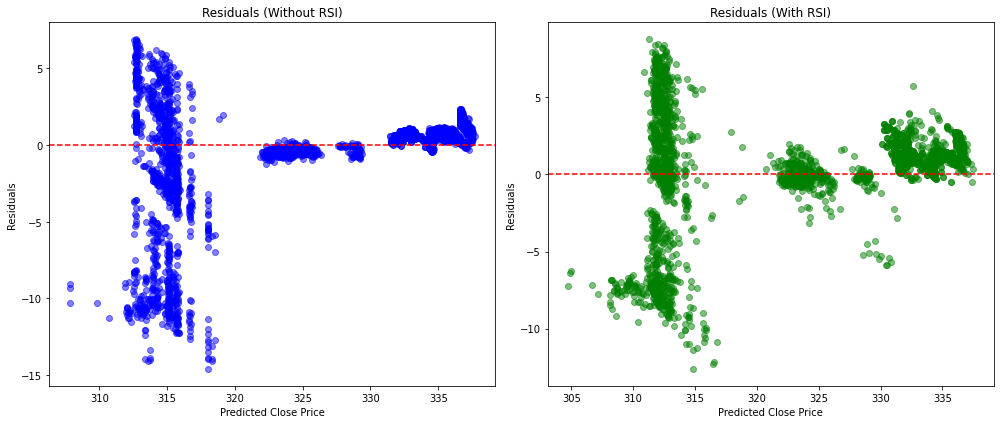

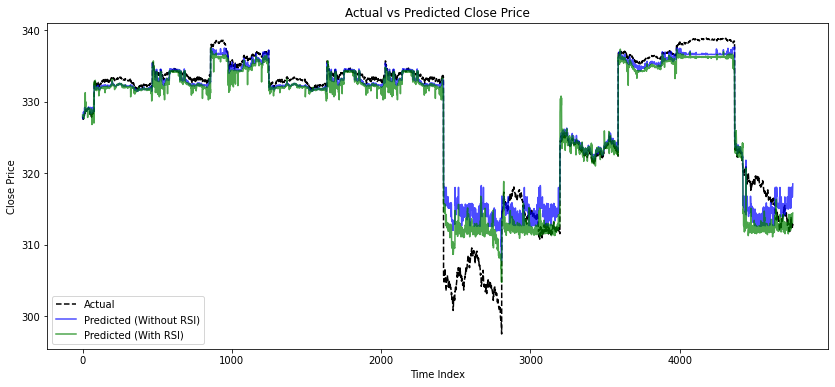

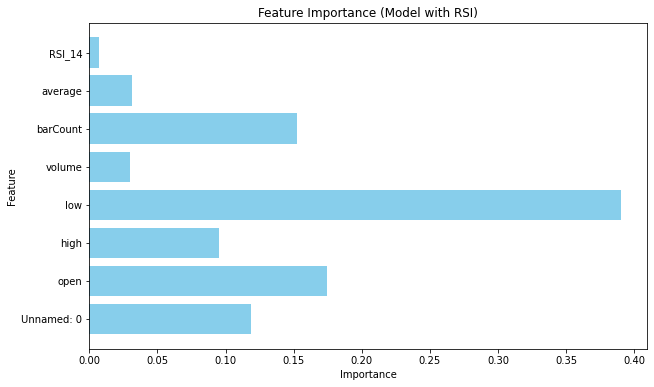

In [11]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming it's already cleaned as before)
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Calculate the 14-period RSI
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data_cleaned['RSI_14'] = calculate_rsi(data_cleaned['close'])

# Drop rows with NaN values caused by the RSI calculation
data_cleaned.dropna(inplace=True)

# Define features (X) and target variable (y) for both scenarios
X = data_cleaned.drop(columns=['close', 'RSI_14'])
y = data_cleaned['close']

X_with_rsi = data_cleaned.drop(columns=['close'])
y_with_rsi = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_rsi, X_test_rsi, y_train_rsi, y_test_rsi = train_test_split(X_with_rsi, y_with_rsi, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model without RSI
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

# Initialize and train the XGBoost model with RSI
xg_reg_rsi = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=100)
xg_reg_rsi.fit(X_train_rsi, y_train_rsi)
y_pred_rsi = xg_reg_rsi.predict(X_test_rsi)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_rsi = mean_squared_error(y_test_rsi, y_pred_rsi)
r2_rsi = r2_score(y_test_rsi, y_pred_rsi)

print(f'MSE without RSI: {mse}')
print(f'R-squared without RSI: {r2}')
print(f'MSE with RSI: {mse_rsi}')
print(f'R-squared with RSI: {r2_rsi}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without RSI
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without RSI)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With RSI
plt.subplot(1, 2, 2)
plt.scatter(y_test_rsi, y_pred_rsi, alpha=0.5, color='green')
plt.plot([y_test_rsi.min(), y_test_rsi.max()], [y_test_rsi.min(), y_test_rsi.max()], '--r')
plt.title('Predicted vs Actual (With RSI)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without RSI
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without RSI)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With RSI
plt.subplot(1, 2, 2)
plt.scatter(y_pred_rsi, y_test_rsi - y_pred_rsi, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With RSI)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without RSI)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_rsi)), y_pred_rsi, label='Predicted (With RSI)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with RSI
feature_importances = xg_reg_rsi.feature_importances_
features = X_with_rsi.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with RSI)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Bollinger Bands

MSE without Bollinger Bands: 12.211152013669516
R-squared without Bollinger Bands: 0.8827852003665287
MSE with Bollinger Bands: 4.914111140812822
R-squared with Bollinger Bands: 0.9528294666955104


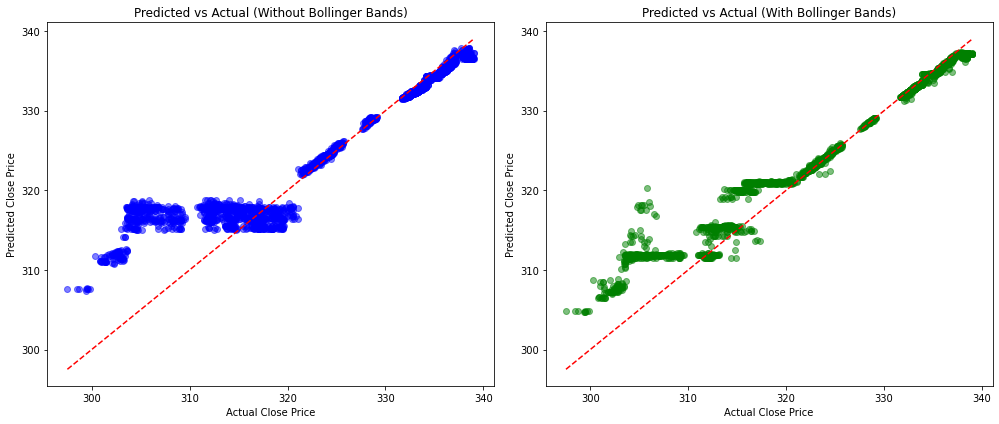

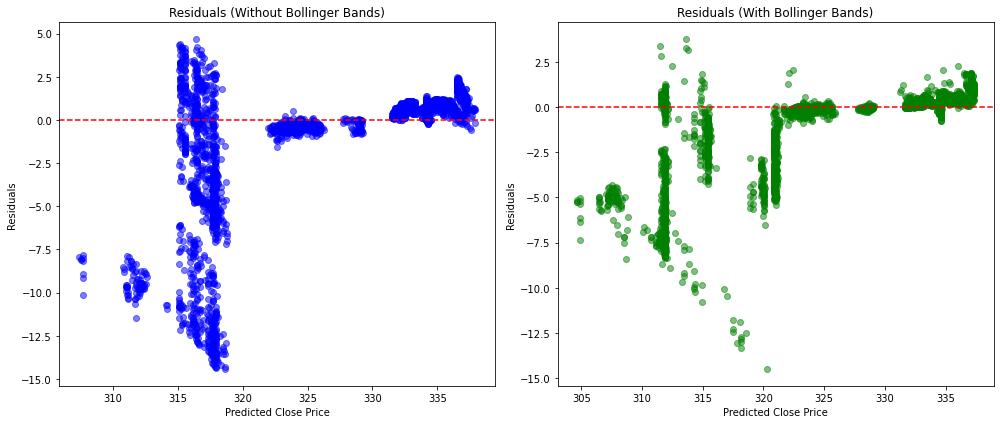

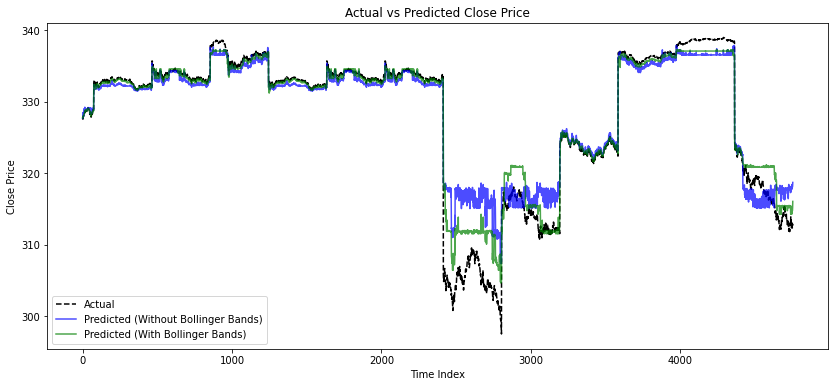

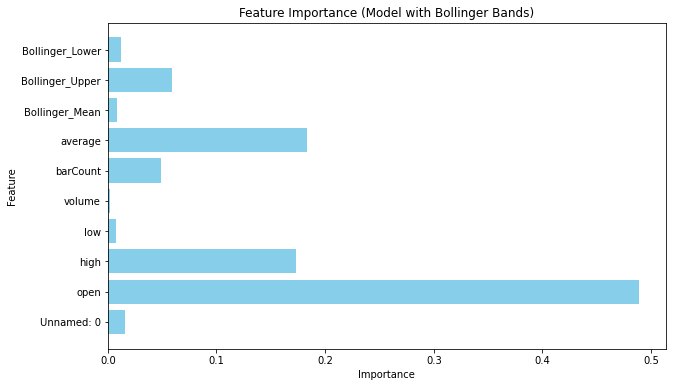

In [12]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming it's already cleaned as before)
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Calculate the Bollinger Bands
def calculate_bollinger_bands(series, window=20, num_std_dev=2):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return rolling_mean, upper_band, lower_band

data_cleaned['Bollinger_Mean'], data_cleaned['Bollinger_Upper'], data_cleaned['Bollinger_Lower'] = calculate_bollinger_bands(data_cleaned['close'])

# Drop rows with NaN values caused by the Bollinger Bands calculation
data_cleaned.dropna(inplace=True)

# Define features (X) and target variable (y) for both scenarios
X = data_cleaned.drop(columns=['close', 'Bollinger_Mean', 'Bollinger_Upper', 'Bollinger_Lower'])
y = data_cleaned['close']

X_with_bbands = data_cleaned.drop(columns=['close'])
y_with_bbands = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_bbands, X_test_bbands, y_train_bbands, y_test_bbands = train_test_split(X_with_bbands, y_with_bbands, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model without Bollinger Bands
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

# Initialize and train the XGBoost model with Bollinger Bands
xg_reg_bbands = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                                 max_depth=5, alpha=10, n_estimators=100)
xg_reg_bbands.fit(X_train_bbands, y_train_bbands)
y_pred_bbands = xg_reg_bbands.predict(X_test_bbands)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_bbands = mean_squared_error(y_test_bbands, y_pred_bbands)
r2_bbands = r2_score(y_test_bbands, y_pred_bbands)

print(f'MSE without Bollinger Bands: {mse}')
print(f'R-squared without Bollinger Bands: {r2}')
print(f'MSE with Bollinger Bands: {mse_bbands}')
print(f'R-squared with Bollinger Bands: {r2_bbands}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without Bollinger Bands
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without Bollinger Bands)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With Bollinger Bands
plt.subplot(1, 2, 2)
plt.scatter(y_test_bbands, y_pred_bbands, alpha=0.5, color='green')
plt.plot([y_test_bbands.min(), y_test_bbands.max()], [y_test_bbands.min(), y_test_bbands.max()], '--r')
plt.title('Predicted vs Actual (With Bollinger Bands)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without Bollinger Bands
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without Bollinger Bands)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With Bollinger Bands
plt.subplot(1, 2, 2)
plt.scatter(y_pred_bbands, y_test_bbands - y_pred_bbands, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With Bollinger Bands)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without Bollinger Bands)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_bbands)), y_pred_bbands, label='Predicted (With Bollinger Bands)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with Bollinger Bands
feature_importances = xg_reg_bbands.feature_importances_
features = X_with_bbands.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with Bollinger Bands)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Stochastic Oscillator

MSE without Stochastic Oscillator: 11.407479335916658
R-squared without Stochastic Oscillator: 0.8904996512052574
MSE with Stochastic Oscillator: 8.71718317502669
R-squared with Stochastic Oscillator: 0.9163237933583002


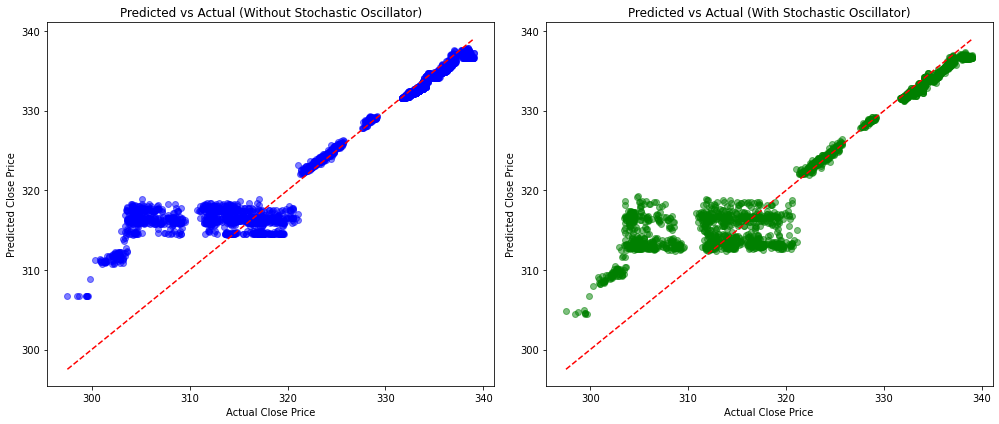

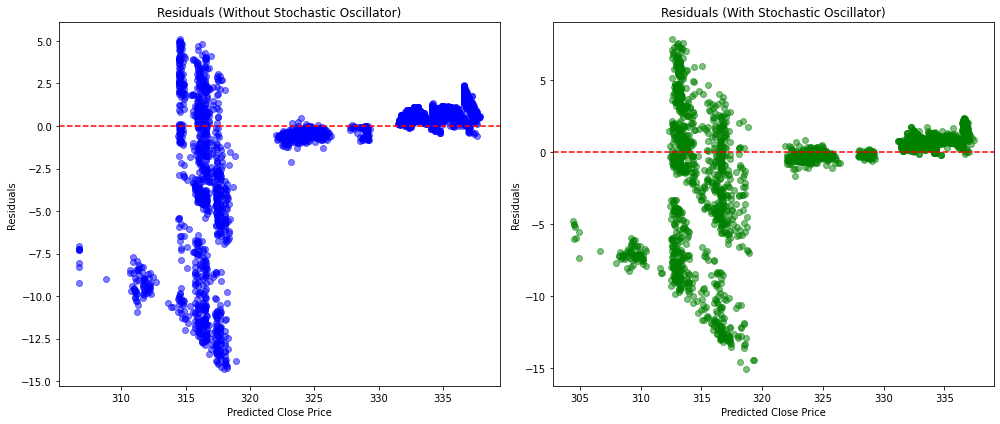

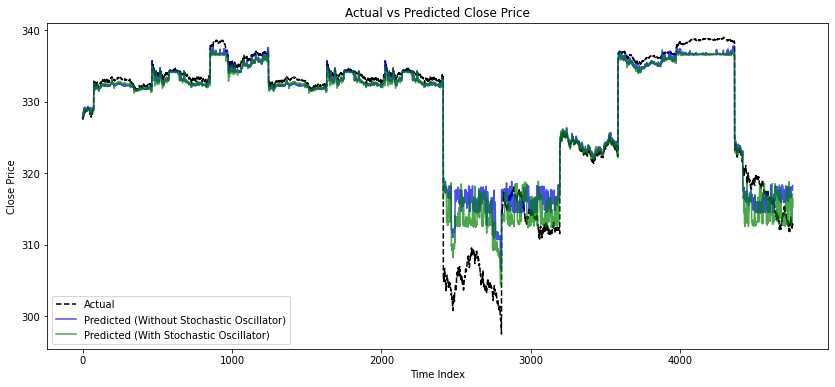

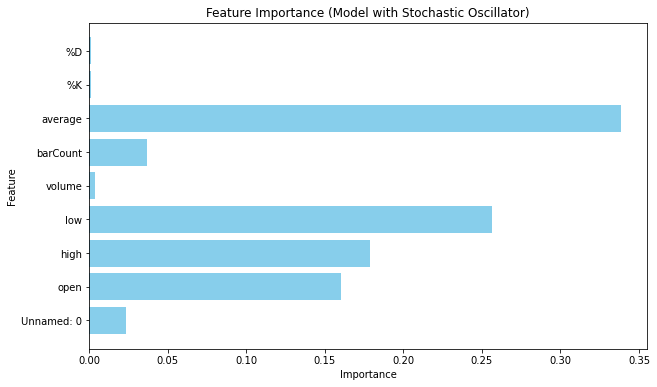

In [13]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming it's already cleaned as before)
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Calculate the Stochastic Oscillator
def calculate_stochastic_oscillator(df, k_window=14, d_window=3):
    high_rolling = df['high'].rolling(window=k_window).max()
    low_rolling = df['low'].rolling(window=k_window).min()
    df['%K'] = 100 * ((df['close'] - low_rolling) / (high_rolling - low_rolling))
    df['%D'] = df['%K'].rolling(window=d_window).mean()
    return df

data_cleaned = calculate_stochastic_oscillator(data_cleaned)

# Drop rows with NaN values caused by the Stochastic Oscillator calculation
data_cleaned.dropna(inplace=True)

# Define features (X) and target variable (y) for both scenarios
X = data_cleaned.drop(columns=['close', '%K', '%D'])
y = data_cleaned['close']

X_with_stoch = data_cleaned.drop(columns=['close'])
y_with_stoch = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_stoch, X_test_stoch, y_train_stoch, y_test_stoch = train_test_split(X_with_stoch, y_with_stoch, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model without Stochastic Oscillator
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

# Initialize and train the XGBoost model with Stochastic Oscillator
xg_reg_stoch = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                                max_depth=5, alpha=10, n_estimators=100)
xg_reg_stoch.fit(X_train_stoch, y_train_stoch)
y_pred_stoch = xg_reg_stoch.predict(X_test_stoch)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_stoch = mean_squared_error(y_test_stoch, y_pred_stoch)
r2_stoch = r2_score(y_test_stoch, y_pred_stoch)

print(f'MSE without Stochastic Oscillator: {mse}')
print(f'R-squared without Stochastic Oscillator: {r2}')
print(f'MSE with Stochastic Oscillator: {mse_stoch}')
print(f'R-squared with Stochastic Oscillator: {r2_stoch}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without Stochastic Oscillator
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without Stochastic Oscillator)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With Stochastic Oscillator
plt.subplot(1, 2, 2)
plt.scatter(y_test_stoch, y_pred_stoch, alpha=0.5, color='green')
plt.plot([y_test_stoch.min(), y_test_stoch.max()], [y_test_stoch.min(), y_test_stoch.max()], '--r')
plt.title('Predicted vs Actual (With Stochastic Oscillator)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without Stochastic Oscillator
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without Stochastic Oscillator)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With Stochastic Oscillator
plt.subplot(1, 2, 2)
plt.scatter(y_pred_stoch, y_test_stoch - y_pred_stoch, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With Stochastic Oscillator)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without Stochastic Oscillator)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_stoch)), y_pred_stoch, label='Predicted (With Stochastic Oscillator)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with Stochastic Oscillator
feature_importances = xg_reg_stoch.feature_importances_
features = X_with_stoch.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with Stochastic Oscillator)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


ADX

MSE without ADX: 7.494136976118641
R-squared without ADX: 0.9280939943846618
MSE with ADX: 6.313739873699547
R-squared with ADX: 0.93941986698952


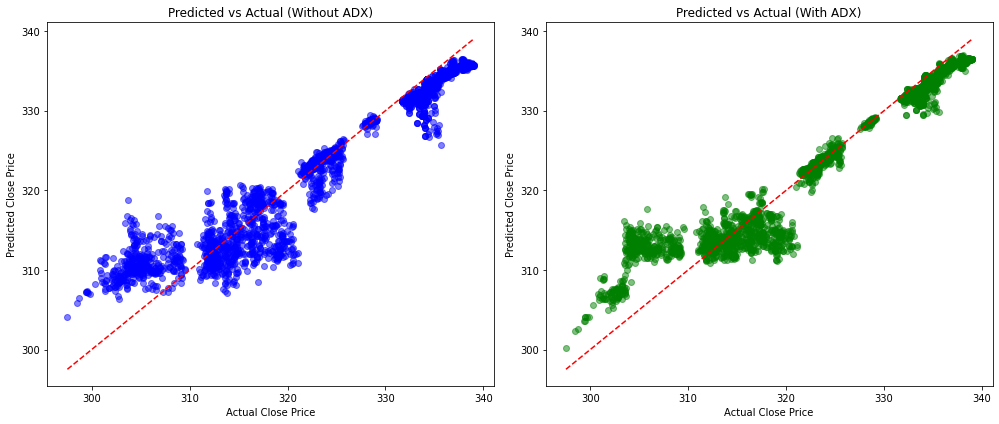

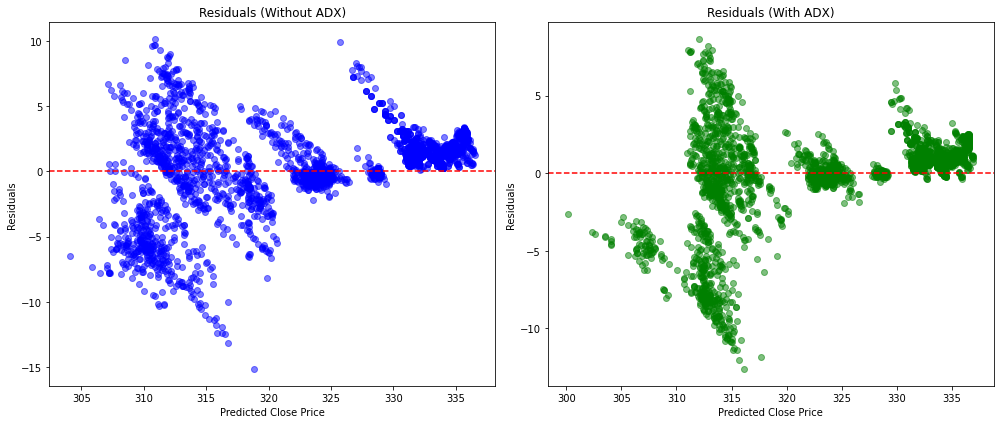

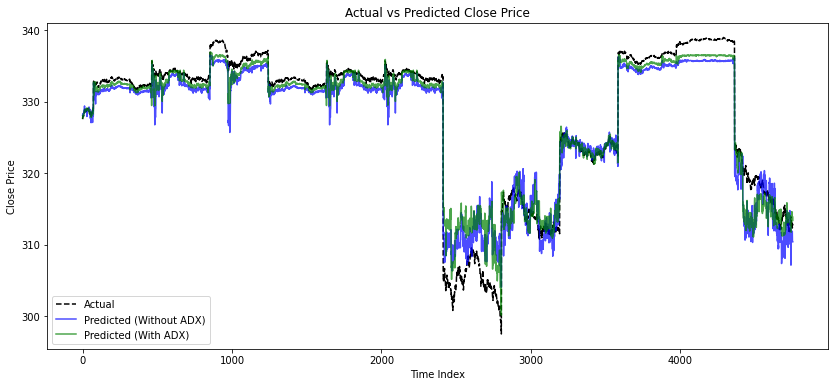

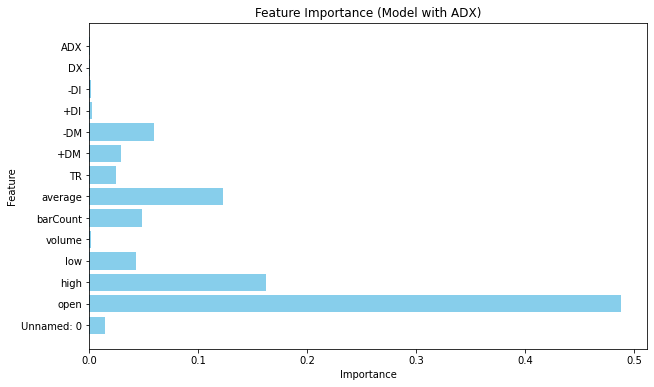

In [14]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming it's already cleaned as before)
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Calculate the Average Directional Index (ADX)
def calculate_adx(df, n=14):
    df['TR'] = df[['high', 'low', 'close']].max(axis=1) - df[['high', 'low']].min(axis=1)
    df['+DM'] = np.where((df['high'] - df['high'].shift(1)) > (df['low'].shift(1) - df['low']), df['high'] - df['high'].shift(1), 0)
    df['+DM'] = np.where(df['+DM'] < 0, 0, df['+DM'])
    df['-DM'] = np.where((df['low'].shift(1) - df['low']) > (df['high'] - df['high'].shift(1)), df['low'].shift(1) - df['low'], 0)
    df['-DM'] = np.where(df['-DM'] < 0, 0, df['-DM'])
    df['TR'] = df['TR'].rolling(window=n).sum()
    df['+DM'] = df['+DM'].rolling(window=n).sum()
    df['-DM'] = df['-DM'].rolling(window=n).sum()
    df['+DI'] = 100 * (df['+DM'] / df['TR'])
    df['-DI'] = 100 * (df['-DM'] / df['TR'])
    df['DX'] = 100 * (np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI']))
    df['ADX'] = df['DX'].rolling(window=n).mean()
    return df

data_cleaned = calculate_adx(data_cleaned)

# Drop rows with NaN values caused by the ADX calculation
data_cleaned.dropna(inplace=True)

# Define features (X) and target variable (y) for both scenarios
X = data_cleaned.drop(columns=['close', 'ADX'])
y = data_cleaned['close']

X_with_adx = data_cleaned.drop(columns=['close'])
y_with_adx = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_adx, X_test_adx, y_train_adx, y_test_adx = train_test_split(X_with_adx, y_with_adx, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model without ADX
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

# Initialize and train the XGBoost model with ADX
xg_reg_adx = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=100)
xg_reg_adx.fit(X_train_adx, y_train_adx)
y_pred_adx = xg_reg_adx.predict(X_test_adx)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_adx = mean_squared_error(y_test_adx, y_pred_adx)
r2_adx = r2_score(y_test_adx, y_pred_adx)

print(f'MSE without ADX: {mse}')
print(f'R-squared without ADX: {r2}')
print(f'MSE with ADX: {mse_adx}')
print(f'R-squared with ADX: {r2_adx}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without ADX
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without ADX)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With ADX
plt.subplot(1, 2, 2)
plt.scatter(y_test_adx, y_pred_adx, alpha=0.5, color='green')
plt.plot([y_test_adx.min(), y_test_adx.max()], [y_test_adx.min(), y_test_adx.max()], '--r')
plt.title('Predicted vs Actual (With ADX)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without ADX
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without ADX)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With ADX
plt.subplot(1, 2, 2)
plt.scatter(y_pred_adx, y_test_adx - y_pred_adx, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With ADX)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without ADX)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_adx)), y_pred_adx, label='Predicted (With ADX)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with ADX
feature_importances = xg_reg_adx.feature_importances_
features = X_with_adx.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with ADX)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


CCI

MSE without CCI: 12.211152013669516
R-squared without CCI: 0.8827852003665287
MSE with CCI: 9.649256929080476
R-squared with CCI: 0.9073768210986205


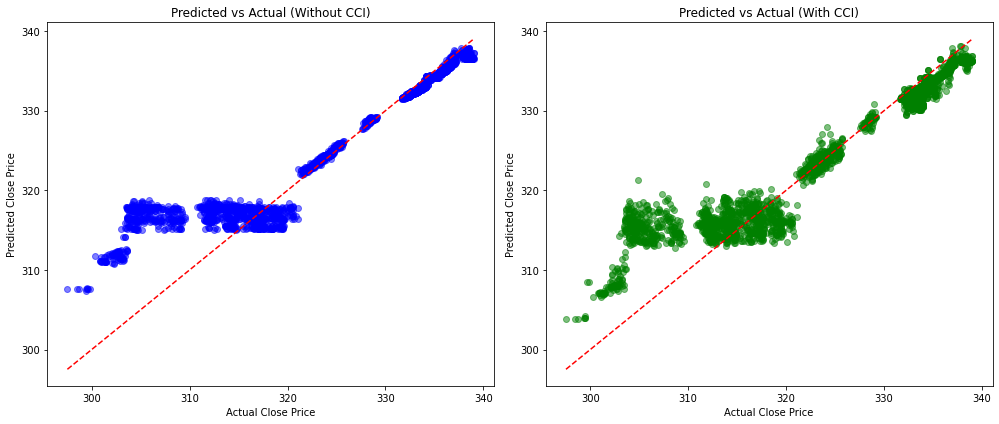

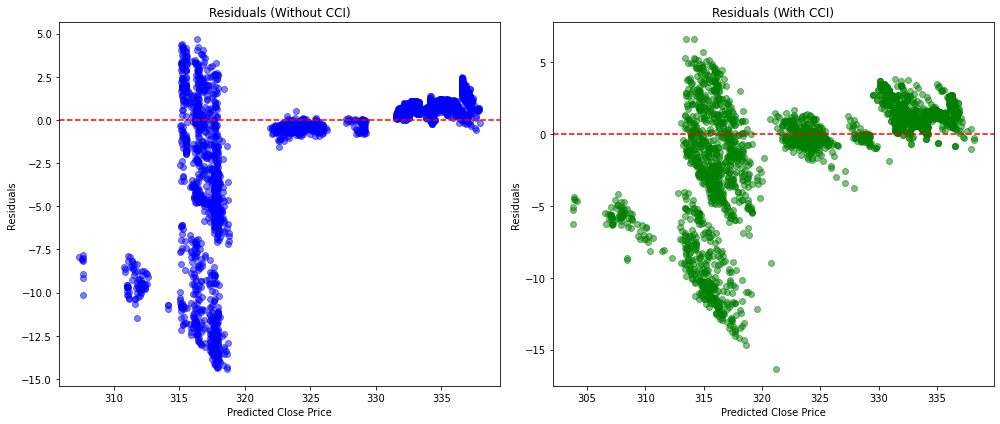

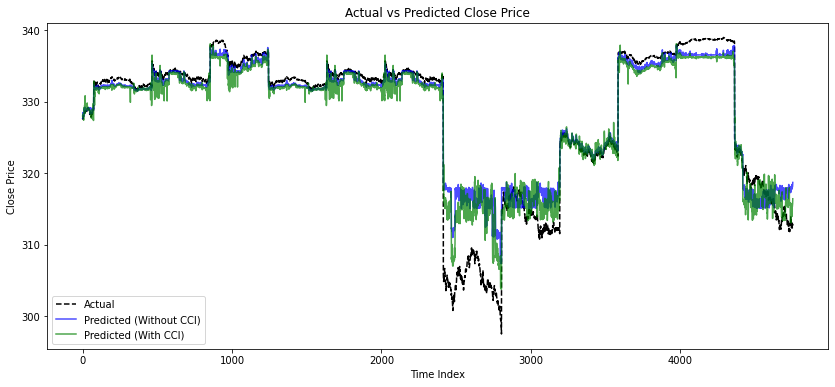

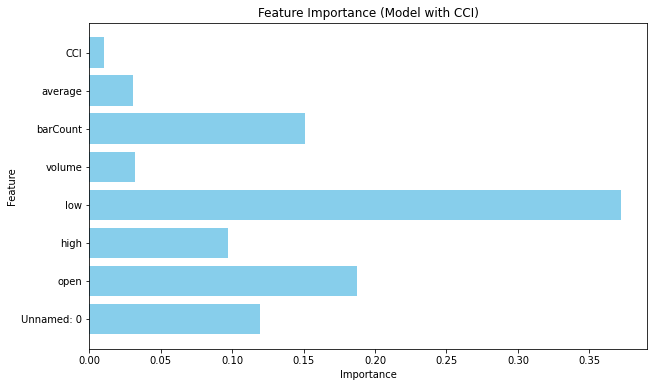

In [15]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming it's already cleaned as before)
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Calculate the Commodity Channel Index (CCI)
def calculate_cci(df, ndays=20):
    df['TP'] = (df['high'] + df['low'] + df['close']) / 3
    df['sma'] = df['TP'].rolling(window=ndays).mean()
    df['mad'] = df['TP'].rolling(window=ndays).apply(lambda x: np.mean(np.abs(x - np.mean(x))))
    df['CCI'] = (df['TP'] - df['sma']) / (0.015 * df['mad'])
    return df

data_cleaned = calculate_cci(data_cleaned)

# Drop rows with NaN values caused by the CCI calculation
data_cleaned.dropna(inplace=True)

# Define features (X) and target variable (y) for both scenarios
X = data_cleaned.drop(columns=['close', 'CCI', 'TP', 'sma', 'mad'])
y = data_cleaned['close']

X_with_cci = data_cleaned.drop(columns=['close', 'TP', 'sma', 'mad'])
y_with_cci = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_cci, X_test_cci, y_train_cci, y_test_cci = train_test_split(X_with_cci, y_with_cci, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model without CCI
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

# Initialize and train the XGBoost model with CCI
xg_reg_cci = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=100)
xg_reg_cci.fit(X_train_cci, y_train_cci)
y_pred_cci = xg_reg_cci.predict(X_test_cci)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_cci = mean_squared_error(y_test_cci, y_pred_cci)
r2_cci = r2_score(y_test_cci, y_pred_cci)

print(f'MSE without CCI: {mse}')
print(f'R-squared without CCI: {r2}')
print(f'MSE with CCI: {mse_cci}')
print(f'R-squared with CCI: {r2_cci}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without CCI
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without CCI)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With CCI
plt.subplot(1, 2, 2)
plt.scatter(y_test_cci, y_pred_cci, alpha=0.5, color='green')
plt.plot([y_test_cci.min(), y_test_cci.max()], [y_test_cci.min(), y_test_cci.max()], '--r')
plt.title('Predicted vs Actual (With CCI)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without CCI
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without CCI)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With CCI
plt.subplot(1, 2, 2)
plt.scatter(y_pred_cci, y_test_cci - y_pred_cci, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With CCI)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without CCI)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_cci)), y_pred_cci, label='Predicted (With CCI)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with CCI
feature_importances = xg_reg_cci.feature_importances_
features = X_with_cci.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with CCI)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


OBV

MSE without OBV: 9.425980366368613
R-squared without OBV: 0.9094631081050873
MSE with OBV: 13.27011449972462
R-squared with OBV: 0.8725400568219582


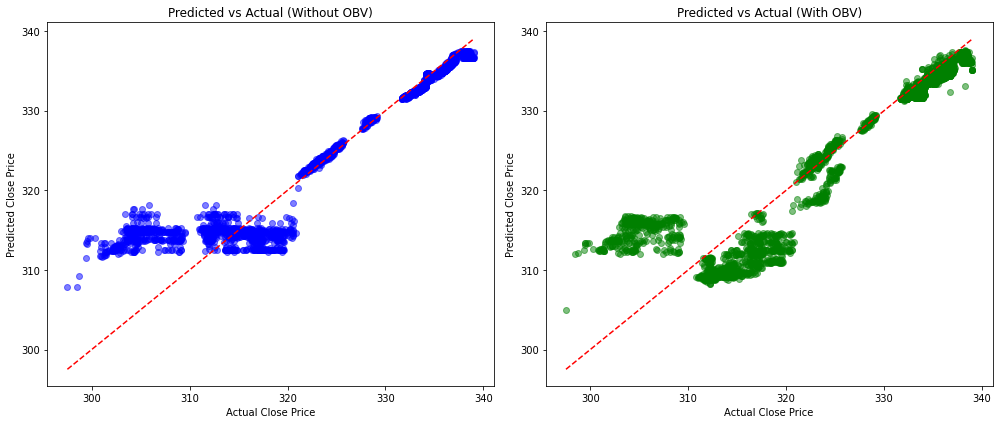

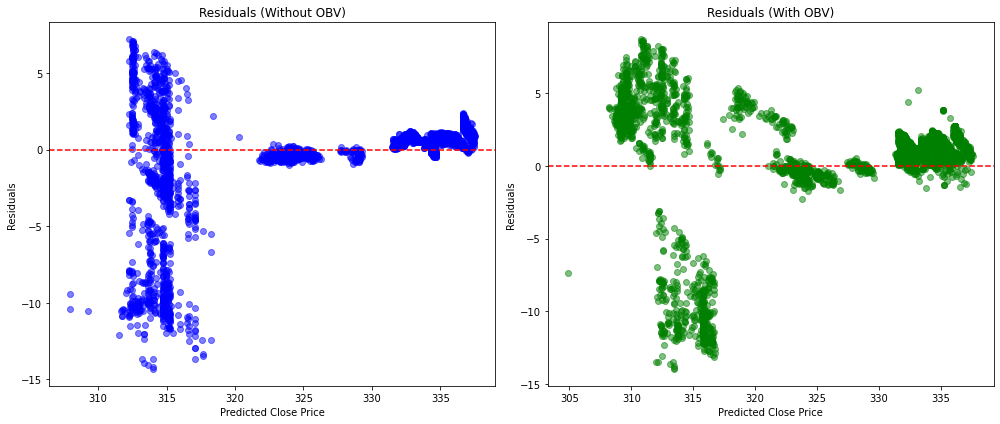

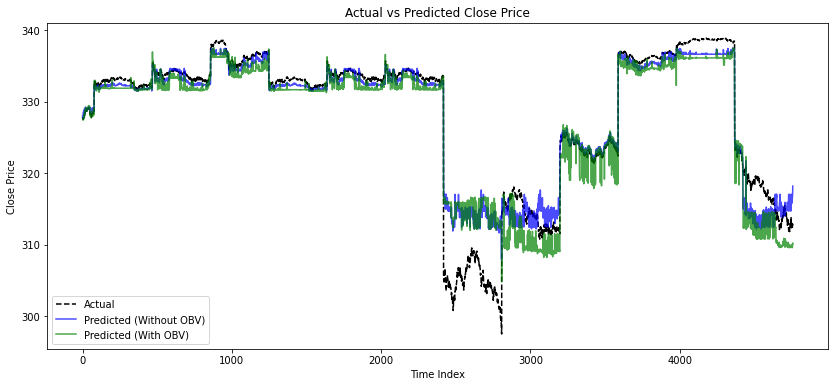

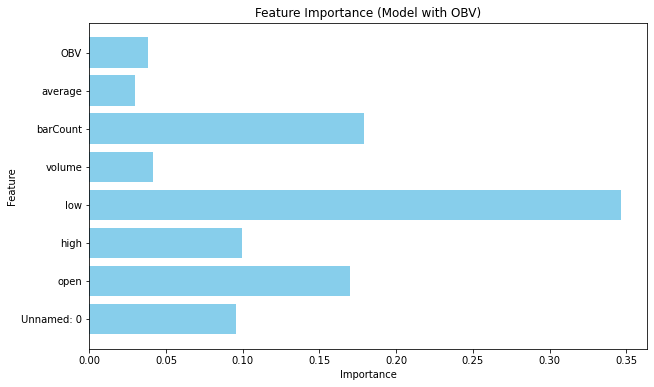

In [16]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming it's already cleaned as before)
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Calculate the On-Balance Volume (OBV)
def calculate_obv(df):
    obv = [0]
    for i in range(1, len(df)):
        if df['close'][i] > df['close'][i-1]:
            obv.append(obv[-1] + df['volume'][i])
        elif df['close'][i] < df['close'][i-1]:
            obv.append(obv[-1] - df['volume'][i])
        else:
            obv.append(obv[-1])
    df['OBV'] = obv
    return df

data_cleaned = calculate_obv(data_cleaned)

# Drop rows with NaN values caused by the OBV calculation (if any)
data_cleaned.dropna(inplace=True)

# Define features (X) and target variable (y) for both scenarios
X = data_cleaned.drop(columns=['close', 'OBV'])
y = data_cleaned['close']

X_with_obv = data_cleaned.drop(columns=['close'])
y_with_obv = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_obv, X_test_obv, y_train_obv, y_test_obv = train_test_split(X_with_obv, y_with_obv, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model without OBV
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

# Initialize and train the XGBoost model with OBV
xg_reg_obv = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=100)
xg_reg_obv.fit(X_train_obv, y_train_obv)
y_pred_obv = xg_reg_obv.predict(X_test_obv)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_obv = mean_squared_error(y_test_obv, y_pred_obv)
r2_obv = r2_score(y_test_obv, y_pred_obv)

print(f'MSE without OBV: {mse}')
print(f'R-squared without OBV: {r2}')
print(f'MSE with OBV: {mse_obv}')
print(f'R-squared with OBV: {r2_obv}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without OBV
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without OBV)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With OBV
plt.subplot(1, 2, 2)
plt.scatter(y_test_obv, y_pred_obv, alpha=0.5, color='green')
plt.plot([y_test_obv.min(), y_test_obv.max()], [y_test_obv.min(), y_test_obv.max()], '--r')
plt.title('Predicted vs Actual (With OBV)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without OBV
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without OBV)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With OBV
plt.subplot(1, 2, 2)
plt.scatter(y_pred_obv, y_test_obv - y_pred_obv, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With OBV)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without OBV)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_obv)), y_pred_obv, label='Predicted (With OBV)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with OBV
feature_importances = xg_reg_obv.feature_importances_
features = X_with_obv.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with OBV)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Fibbonacci Retracement

MSE without Fibonacci Retracement: 12.211152013669516
R-squared without Fibonacci Retracement: 0.8827852003665287
MSE with Fibonacci Retracement: 7.002567261194159
R-squared with Fibonacci Retracement: 0.9327823846986798


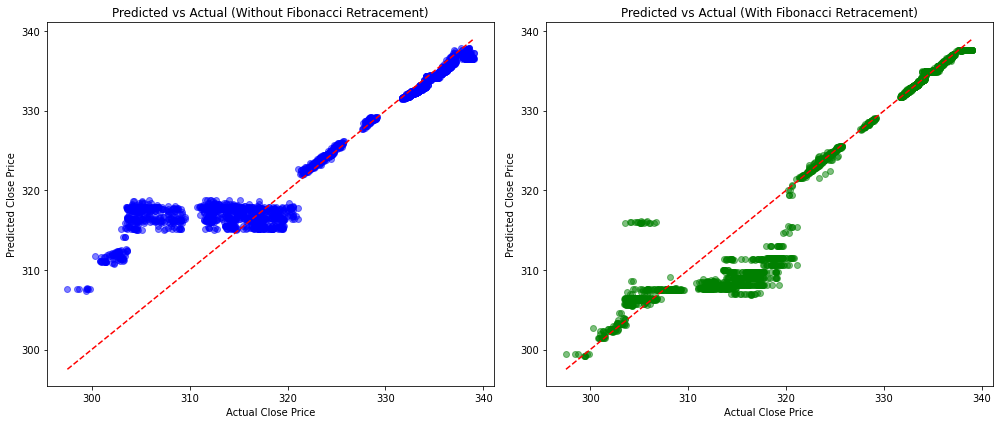

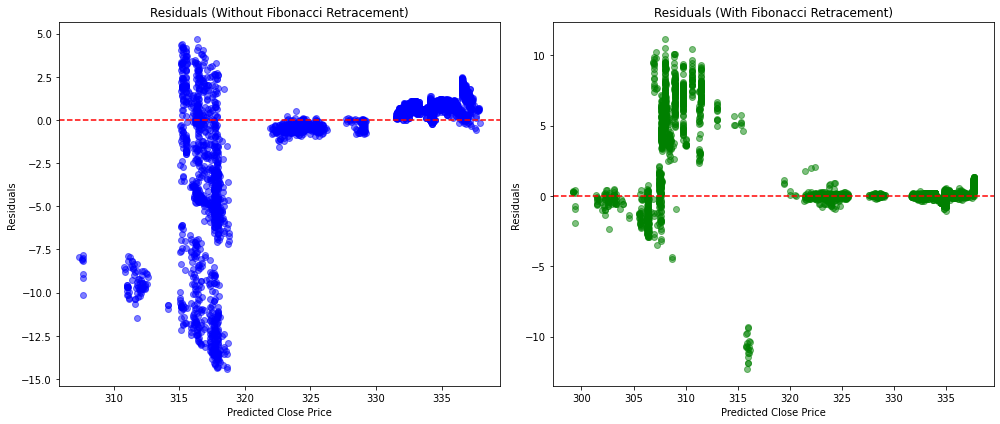

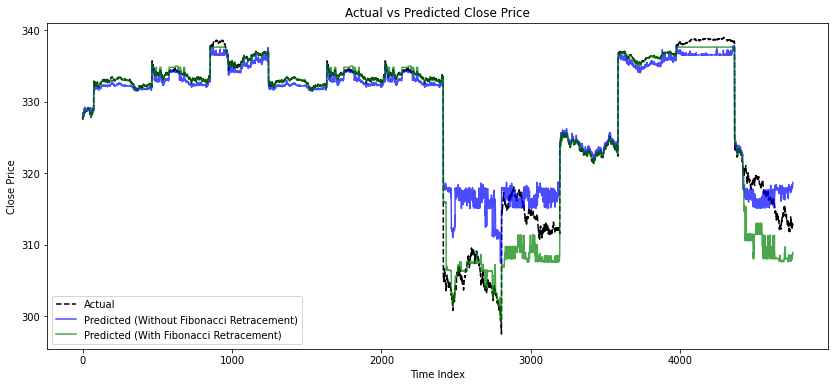

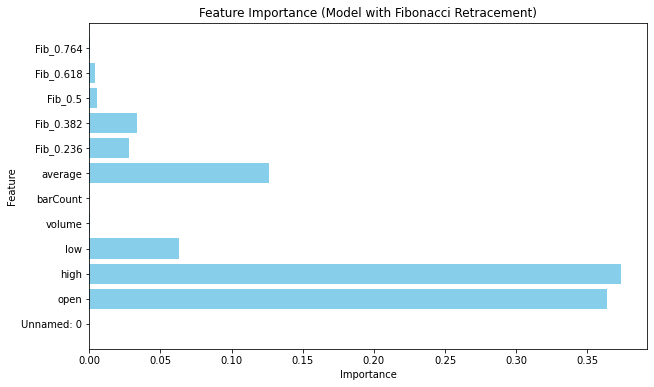

In [17]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming it's already cleaned as before)
data_cleaned = pd.read_csv('q1_filtered_dataset.csv')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.set_index('date', inplace=True)

# Calculate Fibonacci Retracement levels
def calculate_fibonacci_retracement(df, period=20):
    df['Max'] = df['high'].rolling(window=period).max()
    df['Min'] = df['low'].rolling(window=period).min()
    
    # Fibonacci levels
    df['Fib_0.236'] = df['Max'] - 0.236 * (df['Max'] - df['Min'])
    df['Fib_0.382'] = df['Max'] - 0.382 * (df['Max'] - df['Min'])
    df['Fib_0.5'] = df['Max'] - 0.5 * (df['Max'] - df['Min'])
    df['Fib_0.618'] = df['Max'] - 0.618 * (df['Max'] - df['Min'])
    df['Fib_0.764'] = df['Max'] - 0.764 * (df['Max'] - df['Min'])
    
    return df

data_cleaned = calculate_fibonacci_retracement(data_cleaned)

# Drop rows with NaN values caused by the Fibonacci Retracement calculation
data_cleaned.dropna(inplace=True)

# Define features (X) and target variable (y) for both scenarios
X = data_cleaned.drop(columns=['close', 'Fib_0.236', 'Fib_0.382', 'Fib_0.5', 'Fib_0.618', 'Fib_0.764', 'Max', 'Min'])
y = data_cleaned['close']

X_with_fib = data_cleaned.drop(columns=['close', 'Max', 'Min'])
y_with_fib = data_cleaned['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_fib, X_test_fib, y_train_fib, y_test_fib = train_test_split(X_with_fib, y_with_fib, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model without Fibonacci Retracement
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

# Initialize and train the XGBoost model with Fibonacci Retracement
xg_reg_fib = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=100)
xg_reg_fib.fit(X_train_fib, y_train_fib)
y_pred_fib = xg_reg_fib.predict(X_test_fib)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_fib = mean_squared_error(y_test_fib, y_pred_fib)
r2_fib = r2_score(y_test_fib, y_pred_fib)

print(f'MSE without Fibonacci Retracement: {mse}')
print(f'R-squared without Fibonacci Retracement: {r2}')
print(f'MSE with Fibonacci Retracement: {mse_fib}')
print(f'R-squared with Fibonacci Retracement: {r2_fib}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without Fibonacci Retracement
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without Fibonacci Retracement)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With Fibonacci Retracement
plt.subplot(1, 2, 2)
plt.scatter(y_test_fib, y_pred_fib, alpha=0.5, color='green')
plt.plot([y_test_fib.min(), y_test_fib.max()], [y_test_fib.min(), y_test_fib.max()], '--r')
plt.title('Predicted vs Actual (With Fibonacci Retracement)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without Fibonacci Retracement
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without Fibonacci Retracement)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With Fibonacci Retracement
plt.subplot(1, 2, 2)
plt.scatter(y_pred_fib, y_test_fib - y_pred_fib, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With Fibonacci Retracement)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without Fibonacci Retracement)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_fib)), y_pred_fib, label='Predicted (With Fibonacci Retracement)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with Fibonacci Retracement
feature_importances = xg_reg_fib.feature_importances_
features = X_with_fib.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with Fibonacci Retracement)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Comparing all XGboost Models

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming these are the metrics you calculated earlier
results = {
    'Technical Indicator': ['None', 'SMA', 'EMA', 'MACD', 'RSI', 'Bollinger Bands', 
                            'Stochastic Oscillator', 'ADX', 'CCI', 'OBV', 'Fibonacci Retracement'],
    'MSE': [mse, mse_sma, mse_ema, mse_macd, mse_rsi, mse_bbands, mse_stoch, mse_adx, mse_cci, mse_obv, mse_fib],
    'R-squared': [r2, r2_sma, r2_ema, r2_macd, r2_rsi, r2_bbands, r2_stoch, r2_adx, r2_cci, r2_obv, r2_fib]
}

results_df = pd.DataFrame(results)
print(results_df)


      Technical Indicator        MSE  R-squared
0                    None  12.211152   0.882785
1                     SMA   6.516461   0.937435
2                     EMA   5.332476   0.948781
3                    MACD   6.667591   0.935958
4                     RSI   7.860198   0.924503
5         Bollinger Bands   4.914111   0.952829
6   Stochastic Oscillator   8.717183   0.916324
7                     ADX   6.313740   0.939420
8                     CCI   9.649257   0.907377
9                     OBV  13.270114   0.872540
10  Fibonacci Retracement   7.002567   0.932782


Visualize Results

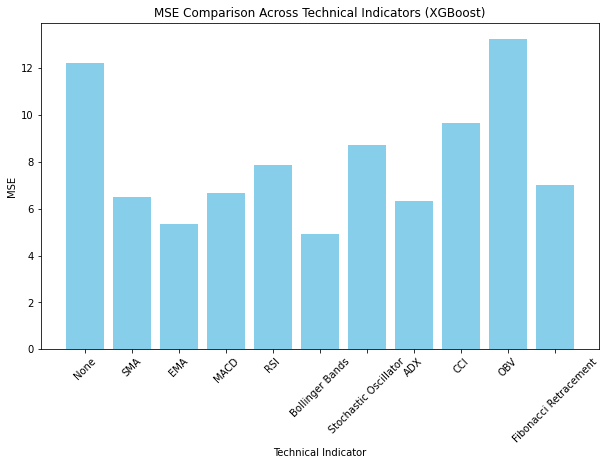

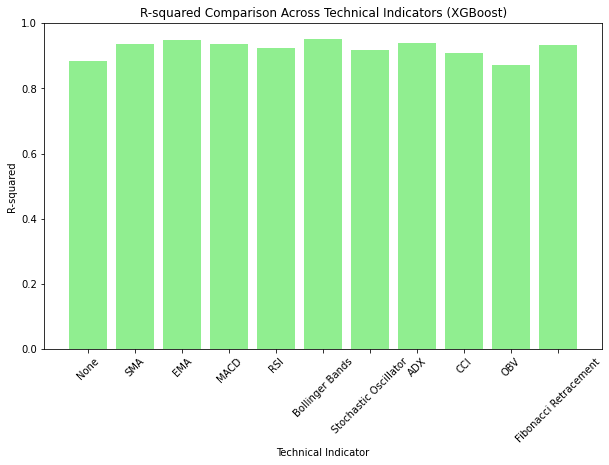

In [19]:
# Plotting MSE comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Technical Indicator'], results_df['MSE'], color='skyblue')
plt.title('MSE Comparison Across Technical Indicators (XGBoost)')
plt.xlabel('Technical Indicator')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

# Plotting R-squared comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Technical Indicator'], results_df['R-squared'], color='lightgreen')
plt.title('R-squared Comparison Across Technical Indicators (XGBoost)')
plt.xlabel('Technical Indicator')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.show()


Statistical Testing

In [20]:
from scipy.stats import ttest_rel
from sklearn.model_selection import cross_val_score

# Initialize results list
t_test_results = []

# Perform cross-validation and paired t-test for each indicator
for indicator, model_with_indicator, X_with_indicator, y_with_indicator in zip(
    ['SMA', 'EMA', 'MACD', 'RSI', 'Bollinger Bands', 'Stochastic Oscillator', 'ADX', 'CCI', 'OBV', 'Fibonacci Retracement'],
    [xg_reg_sma, xg_reg_ema, xg_reg_macd, xg_reg_rsi, xg_reg_bbands, xg_reg_stoch, xg_reg_adx, xg_reg_cci, xg_reg_obv, xg_reg_fib],
    [X_with_sma, X_with_ema, X_with_macd, X_with_rsi, X_with_bbands, X_with_stoch, X_with_adx, X_with_cci, X_with_obv, X_with_fib],
    [y_with_sma, y_with_ema, y_with_macd, y_with_rsi, y_with_bbands, y_with_stoch, y_with_adx, y_with_cci, y_with_obv, y_with_fib]
):
    # Cross-validation without the indicator
    cv_mse_without_indicator = cross_val_score(xg_reg, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_mse_without_indicator = -cv_mse_without_indicator

    # Cross-validation with the indicator
    cv_mse_with_indicator = cross_val_score(model_with_indicator, X_with_indicator, y_with_indicator, cv=5, scoring='neg_mean_squared_error')
    cv_mse_with_indicator = -cv_mse_with_indicator

    # Perform paired t-test
    t_stat, p_value = ttest_rel(cv_mse_without_indicator, cv_mse_with_indicator)
    
    # Append results to the list
    t_test_results.append({
        'Technical Indicator': indicator,
        't-statistic': t_stat,
        'p-value': p_value
    })

# Convert results to DataFrame
t_test_results_df = pd.DataFrame(t_test_results)

# Display the results
print(t_test_results_df)


     Technical Indicator  t-statistic   p-value
0                    SMA     2.089147  0.104932
1                    EMA     2.072908  0.106877
2                   MACD     1.689303  0.166429
3                    RSI    -0.767007  0.485844
4        Bollinger Bands     2.080754  0.105932
5  Stochastic Oscillator     2.492796  0.067283
6                    ADX     2.028646  0.112386
7                    CCI    -0.422824  0.694165
8                    OBV    -2.101645  0.103461
9  Fibonacci Retracement     2.164220  0.096432


1. SMA, EMA, Bollinger Bands, ADX, and Fibonacci Retracement have t-statistics greater than 2, suggesting that these indicators might be making a positive contribution to the model. However, their p-values are all above the conventional significance level of 0.05, indicating that these results are not statistically significant.

2. Stochastic Oscillator has the highest t-statistic among the indicators, and its p-value is closer to the 0.05 threshold (0.067283). This suggests that Stochastic Oscillator might be the most impactful indicator among those tested, though it still doesn't reach the threshold for statistical significance.

3. MACD, RSI, CCI, and OBV have lower t-statistics, and in some cases, the negative t-statistic (for OBV and RSI) suggests that these indicators might not be beneficial for the model. Again, none of these p-values are below 0.05, indicating that the changes they cause are not statistically significant.